In [72]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import decomposition
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_result = df_test[['PassengerId']].copy()
df_result['Survived'] = pd.Series(np.random.randn(len(df_result)), index=df_result.index)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [74]:
def normalizeDf(df):
    temp = df.values
    min_max_scaler = preprocessing.MinMaxScaler()
    temp_scaled = min_max_scaler.fit_transform(temp)
    df = pd.DataFrame(temp_scaled)
    df.columns = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
    return df

In [75]:
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)
fare_mean = df_train['Fare'].mean()
fare_median = df_train['Fare'].median()

"""for i in range(0,len(df_train['Fare'])):
    val = df_train.iloc[i]['Fare']
    if(val<=fare_median):
        df_train.at[i,'Fare']  = 1
    elif(val>fare_median and val<=fare_mean):
        df_train.at[i,'Fare'] = 2
    else:
        df_train.at[i,'Fare'] = 3

for i in range(0, len(df_test['Fare'])):
    val = df_test.iloc[i]['Fare']
    if(val<=fare_median):
        df_test.at[i,'Fare'] = 1
    elif(val>fare_median and val<=fare_mean):
        df_test.at[i,'Fare'] = 2
    else:
        df_test.at[i,'Fare'] = 3"""
        
        
"""for i in range(0,len(df_train['Age'])):
    val = df_train.iloc[i]['Age']
    if(val<=15):
        df_train.at[i,'Age']  = 1
    elif(val>15 and val<=50):
        df_train.at[i,'Age'] = 2
    else:
        df_train.at[i,'Age'] = 3

for i in range(0, len(df_test['Age'])):
    val = df_test.iloc[i]['Age']
    if(val<=15):
        df_test.at[i,'Age'] = 1
    elif(val>15 and val<=50):
        df_test.at[i,'Age'] = 2
    else:
        df_test.at[i,'Age'] = 3"""

df_train['Sex'].replace(['female','male'],[1,2],inplace=True)
df_test['Sex'].replace(['female','male'],[1,2],inplace=True)
df_train['Embarked'].replace(['Q','S','C'],[1,2,3],inplace=True)
df_test['Embarked'].replace(['Q','S','C'],[1,2,3],inplace=True)

#df_train_mod = normalizeDf(df_train[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']])
#df_test_mod = normalizeDf(df_test[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']])
#df_test['Pclass'] = (eg_array - eg_array.mean(axis=0)) / eg_array.std(axis=0)

#X = df_train[['Pclass..','Sex..','Age0.015','SibSp','Parch..','Fare..0.3','Embarked..']]
X = df_train[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y = df_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)
X_toTest = df_test[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

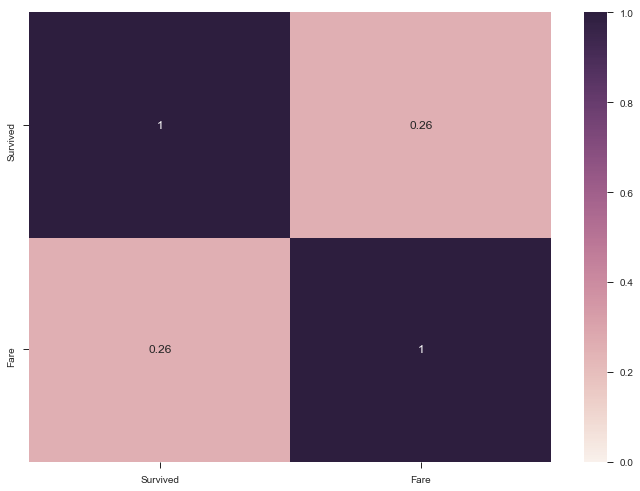

In [77]:
#Data analysis starts
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
corr = df_train[['Survived','Fare']].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
          ax=ax,vmin=0,vmax=1,annot=True)
plt.show()

In [129]:
X_train.head(6)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
599,1,2,2.0,1,0,3.0,3
830,3,1,1.0,1,0,1.0,3
306,1,1,1.0,0,0,3.0,3
231,3,2,2.0,0,0,1.0,2
845,3,2,2.0,0,0,1.0,2
49,3,1,2.0,1,0,2.0,2


In [130]:
scaler = preprocessing.StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [131]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_toTest = scaler.transform(X_toTest)

In [132]:
"""pca = decomposition.PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_toTest = pca.transform(X_toTest)"""

'pca = decomposition.PCA()\nX_train = pca.fit_transform(X_train)\nX_test = pca.transform(X_test)\nX_toTest = pca.transform(X_toTest)'

In [133]:
"""tuned_parameters = [{'kernel': ['linear'], 'C': [0.0001,0.001,0.01,0.1, 1, 10]}]
clf = GridSearchCV(svm.SVC(), tuned_parameters, cv=5)"""

"tuned_parameters = [{'kernel': ['linear'], 'C': [0.0001,0.001,0.01,0.1, 1, 10]}]\nclf = GridSearchCV(svm.SVC(), tuned_parameters, cv=5)"

In [134]:
#clf = AdaBoostClassifier(RandomForestClassifier(max_depth=1),algorithm="SAMME",n_estimators=200)
clf = MLPClassifier(hidden_layer_sizes=(4,))
#clf = RandomForestClassifier()
clf.fit(X_train, y_train)
#print(clf.best_params_)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [135]:
y_pred = clf.predict(X_toTest)
"""y_pred = clf.predict(X_test)
acc = accuracy_score(y_test,y_pred)
acc"""

'y_pred = clf.predict(X_test)\nacc = accuracy_score(y_test,y_pred)\nacc'

In [136]:
df_result['Survived'] = y_pred
df_result.to_csv('submission.csv')